数据检视

训练集形状: (50000, 3, 32, 32)
训练标签形状: (50000,)
测试集形状: (10000, 3, 32, 32)
测试标签形状: (10000,)
数据范围: [0.000, 1.000]


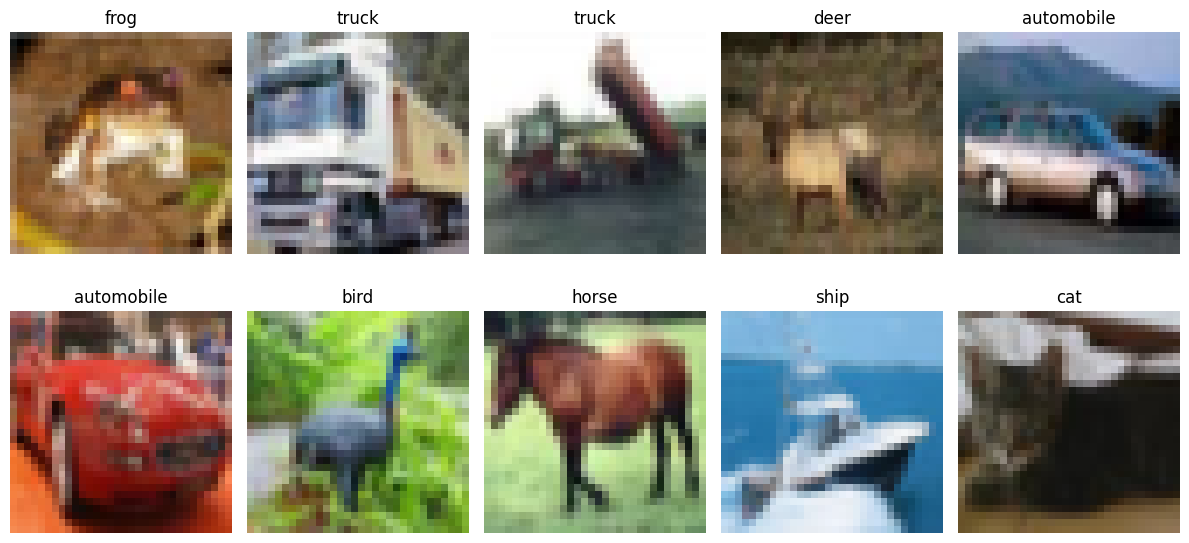

In [1]:
import pickle
import matplotlib.pyplot as plt
import numpy as np
import os


def load_cifar10_file(filename):
    """通用的CIFAR-10文件加载函数"""
    with open(filename, 'rb') as fo:
        data = pickle.load(fo, encoding='latin1')
    return data

def get_cifar10_train_data_and_label(root=""):
    """加载CIFAR-10训练集"""
    data_files = [
        'data_batch_1', 'data_batch_2', 'data_batch_3', 
        'data_batch_4', 'data_batch_5'
    ]
    
    dataset = []
    labelset = []
    
    for file_name in data_files:
        data = load_cifar10_file(os.path.join(root, file_name))
        # CIFAR-10数据格式：data['data']形状为(10000, 3072)
        # 需要转换为(10000, 3, 32, 32)并归一化
        img_data = data["data"].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
        img_labels = np.array(data["labels"])
        
        dataset.append(img_data)
        labelset.append(img_labels)
    
    # 合并所有批次
    dataset = np.concatenate(dataset, axis=0)
    labelset = np.concatenate(labelset, axis=0)
    
    return dataset, labelset

def get_cifar10_test_data_and_label(root=""):
    """加载CIFAR-10测试集"""
    data = load_cifar10_file(os.path.join(root, 'test_batch'))
    
    # 转换数据格式并归一化
    dataset = data["data"].reshape(-1, 3, 32, 32).astype(np.float32) / 255.0
    labelset = np.array(data["labels"])
    
    return dataset, labelset

def get_CIFAR10_dataset(root=""):
    """获取完整的CIFAR-10数据集"""
    train_dataset, train_labels = get_cifar10_train_data_and_label(root=root)
    test_dataset, test_labels = get_cifar10_test_data_and_label(root=root)  # 修正：调用正确的测试集函数
    
    return train_dataset, train_labels, test_dataset, test_labels

if __name__ == "__main__":
    # 使用示例
    root_path = r"D:\table\机器学习作业2\data"  # 确保路径正确
    
    train_dataset, train_labels, test_dataset, test_labels = get_CIFAR10_dataset(root=root_path)
    
    print(f"训练集形状: {train_dataset.shape}")
    print(f"训练标签形状: {train_labels.shape}")
    print(f"测试集形状: {test_dataset.shape}")
    print(f"测试标签形状: {test_labels.shape}")
    print(f"数据范围: [{train_dataset.min():.3f}, {train_dataset.max():.3f}]")
    
    
    
    def show_cifar_samples(images, labels, classes, num_samples=10):
        """显示CIFAR样本"""
        fig, axes = plt.subplots(2, 5, figsize=(12, 6))
        axes = axes.ravel()
        
        for i in range(num_samples):
            # 调整通道顺序为 (H, W, C) 用于显示
            img = np.transpose(images[i], (1, 2, 0))
            axes[i].imshow(img)
            axes[i].set_title(f"{classes[labels[i]]}")
            axes[i].axis('off')
        
        plt.tight_layout()
        plt.show()
    
    # CIFAR-10类别
    classes = ['airplane', 'automobile', 'bird', 'cat', 'deer',
               'dog', 'frog', 'horse', 'ship', 'truck']
    
    # 显示一些训练样本
    show_cifar_samples(train_dataset, train_labels, classes)